In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("dataset.csv")

In [3]:
data.head()

,Location,PovPct,Brth15to17,Brth18to19,ViolCrime,TeenBrth
0,Alabama,20.1,31.5,88.7,11.2,54.5
1,Alaska,7.1,18.9,73.7,9.1,39.5
2,Arizona,16.1,35.0,102.5,10.4,61.2
3,Arkansas,14.9,31.6,101.7,10.4,59.9
4,California,16.7,22.6,69.1,11.2,41.1


In [4]:
data.rename(columns={"Brth15to17":"Y","TeenBrth":"X"},inplace=True)
data=data[['X','Y']]

In [5]:
data.head()

,X,Y
0,54.5,31.5
1,39.5,18.9
2,61.2,35.0
3,59.9,31.6
4,41.1,22.6


C:\Users\schum\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

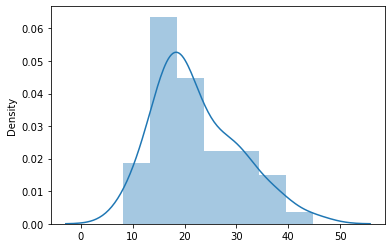

In [28]:
import seaborn as sns
sns.distplot(Y)

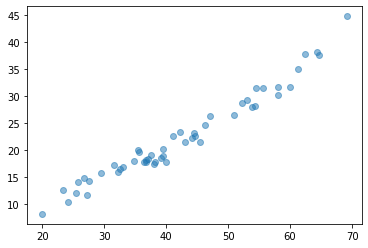

In [6]:
import matplotlib.pyplot as plt
plt.scatter(data.X,data.Y, alpha=0.5)

In [19]:
X = data.X.values
Y=  data.Y.values

In [20]:
def compute_slope(X,Y):
    n_sum=0
    d1=d2=0
    x_mean = np.mean(X)
    y_mean = np.mean(Y)
    for i in range(len(X)):
        n_sum = n_sum + (X[i]-x_mean)*(Y[i]-y_mean)
    
    for i in range(len(X)):
        d1=d1+(X[i]-x_mean)**2
        d2=d2+(Y[i]-y_mean)**2
        
    d=(d1*d2)**(1/2)
    
    r= n_sum/d
    
    Sx=np.std(X)
    Sy=np.std(Y)
    
    m = (r*Sy)/Sx
    
    return m

    

In [21]:
def compute_intercept(m,x_mean,y_mean):
    c = y_mean-m*x_mean
    return c


In [23]:
m = compute_slope(X,Y)
c = compute_intercept(m,np.mean(X),np.mean(Y))


In [29]:
print(m,c)

0.6391349159638955 -4.7167110382865935


In [24]:
y_hat = [x*m+c for x in X]

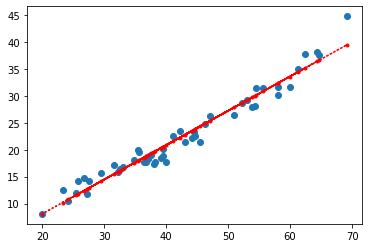

In [26]:
plt.scatter(X, Y)
plt.plot(X, y_hat, c= "red", marker='.', linestyle=':')
plt.show()